In [15]:
# enable automatic reloading of the notebook
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Tutorial: Overview
This notebook provides a demonstration how the ts2g2 library can be used to convert time series into graphs and graphs into time series, with links to more detailed tutorials. To that end, we use a dataset with the history of daily prices of Amazon stock (AMZN) and Apple stock (APPLE). All the column descriptions are provided. Currency is USD.

In [16]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

import matplotlib.pyplot as plt
from core.model import Timeseries, TimeseriesPreprocessing, TimeseriesPreprocessingSegmentation, TimeseriesPreprocessingSlidingWindow, TimeseriesPreprocessingComposite, TimeseriesView, TimeGraph, ToSequenceVisitorSlidingWindow, ToSequenceVisitor, ToSequenceVisitorOrdinalPartition
from tsg_io.input import CsvFile
from from_graph.strategy_to_time_sequence import StrategyNextValueInNodeRandom, StrategyNextValueInNodeRandomForSlidingWindow, StrategyNextValueInNodeRoundRobin, StrategyNextValueInNodeRoundRobinForSlidingWindow, StrategySelectNextNodeRandomlyFromNeighboursAcrossGraphs, StrategySelectNextNodeRandomlyFromNeighboursFromFirstGraph, StrategySelectNextNodeRandomly, StrategySelectNextNodeRandomDegree, StrategySelectNextNodeRandomWithRestart, StrategyNextValueInNodeOrdinalPartition
from to_graph.strategy_linking_graph import StrategyLinkingGraphByValueWithinRange, LinkNodesWithinGraph
from to_graph.strategy_linking_multi_graphs import LinkGraphs
from to_graph.strategy_to_graph import BuildTimeseriesToGraphNaturalVisibilityStrategy, BuildTimeseriesToGraphHorizontalVisibilityStrategy, BuildTimeseriesToGraphOrdinalPartition, BuildTimeseriesToGraphQuantile

## Loading data 
We first load the dataset :)

In [17]:
amazon_path = os.path.join(os.getcwd(), "amazon", "AMZN.csv")
apple_path = os.path.join(os.getcwd(), "apple", "APPLE.csv")


In [18]:
def plot_timeseries(sequence, title, x_legend, y_legend, color = "black"):
    plt.figure(figsize=(10, 6))
    plt.plot(sequence, linestyle='-', color=color)
    
    plt.title(title)
    plt.xlabel(x_legend)
    plt.ylabel(y_legend)
    plt.grid(True)
    plt.show()

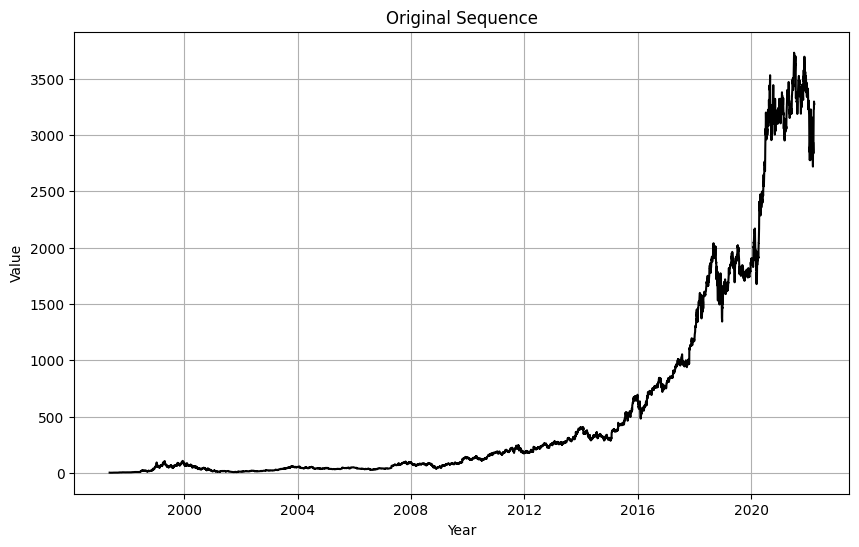

In [19]:
plot_timeseries(CsvFile(amazon_path, "Close").from_csv(), "Original Sequence", "Year", "Value")

For easier presentation and understanding we will only analyze a segment of this timeseries.

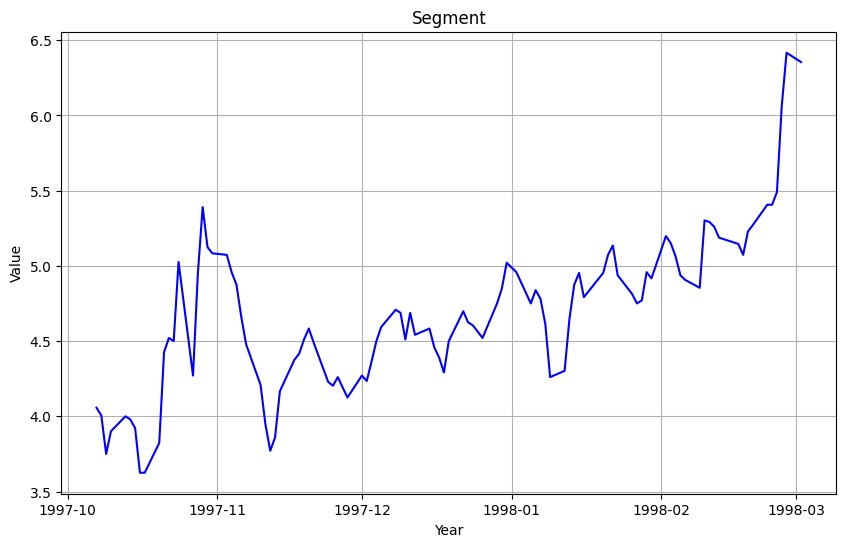

In [20]:
plot_timeseries(CsvFile(amazon_path, "Close").from_csv()[100:200], "Segment", "Year", "Value", color="blue")

# To graph
We can now turn this segment of timeseries into a graph:

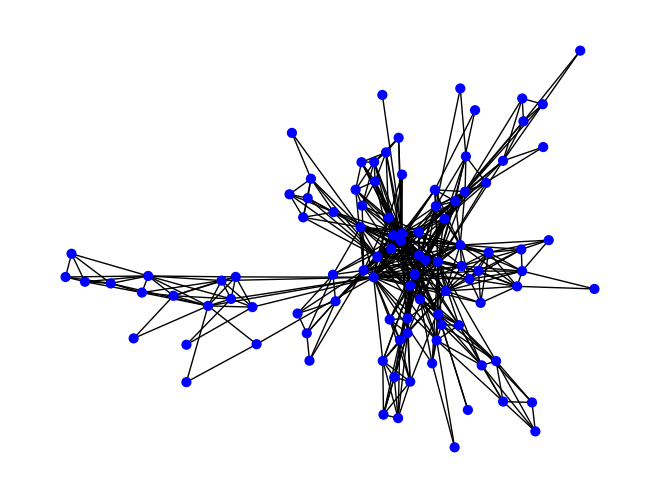

In [21]:
timegraph = Timeseries(CsvFile(amazon_path, "Close").from_csv())\
    .with_preprocessing(TimeseriesPreprocessingSegmentation(100, 200))\
    .to_graph(BuildTimeseriesToGraphNaturalVisibilityStrategy().get_strategy())\
    .draw("blue")

There are multiple of different methods of turning timeseries into graphs. So far we have implemented:
    - Natural visibility strategy: ...
    - Horizontal visibility strategy: ...
    - Strategy using quantiles: ...
    - Ordinal partition strategy: ...

Along with these strategies, we have constructed strategy, to turn timeseries into a sliding window graph: ...

# To timeseries

When we have our graph, we can also generate a timeseries from it.

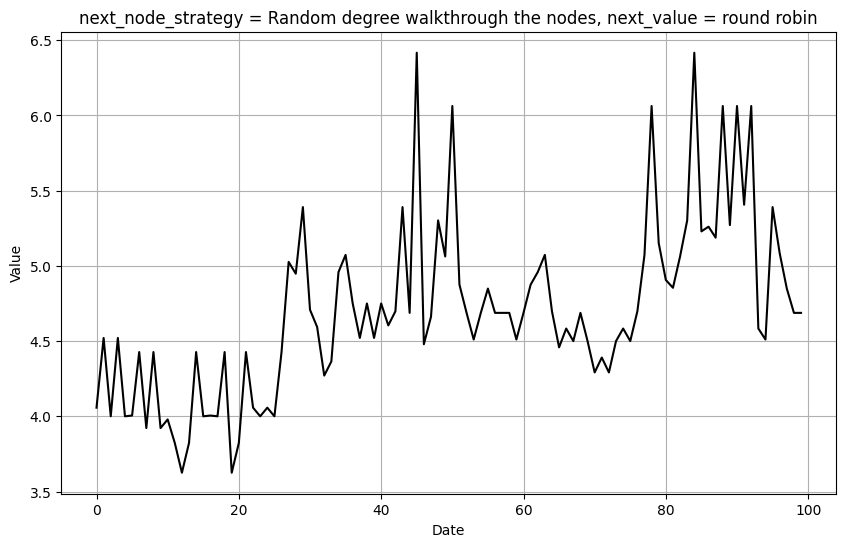

In [22]:
timegraph.to_sequence(ToSequenceVisitor()\
        .next_node_strategy(StrategySelectNextNodeRandomDegree())\
        .next_value_strategy(StrategyNextValueInNodeRoundRobin())\
        .ts_length(100))\
    .draw_sequence()

There are also many different ways of generating timeseries. You can take closer look at them here: ...

A compact tutorial of different timeseries to graph and back methods along with some extra functions can be found here: ...

# Timeseries and graph embeddings
We can compare different graphs and timeseries among each other by creating and calculating distance between their embeddings.
You can take a closer look how this is done here: ...